### 소방청 연간 화재 통계 데이터(2019년) 불러오기

In [4]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data/소방청_연간화재통계_20191231.csv", encoding='ansi')
display(data.head(10))

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
5,2019-01-01 01:14,서울특별시,서초구,우면동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,0,0,0,50,주거,공동주택,아파트
6,2019-01-01 01:24,충청남도,서천군,마서면,"건축,구조물","담뱃불, 라이터불","라이터불, 성냥불",방화,방화,가연성가스,프로판가스,0,0,0,1127,주거,단독주택,단독주택
7,2019-01-01 01:37,경기도,시흥시,대야동,"건축,구조물","불꽃, 불티","기타(불꽃,불티)",부주의,음식물 조리중,식품,음식물,0,0,0,58,생활서비스,음식점,기타 음식점
8,2019-01-01 01:47,서울특별시,중랑구,중화동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,0,0,0,22,주거,단독주택,단독주택
9,2019-01-01 01:53,충청남도,당진시,읍내동,기타(쓰레기 화재등),"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,쓰레기류,쓰레기,0,0,0,159,기타,야외,기타야외


In [5]:
data.info() #총 40,103개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40103 entries, 0 to 40102
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   화재발생년월일    40103 non-null  object
 1   시도         40103 non-null  object
 2   시·군·구      40103 non-null  object
 3   읍면동        40103 non-null  object
 4   화재유형       40103 non-null  object
 5   발화열원대분류    40103 non-null  object
 6   발화열원소분류    40103 non-null  object
 7   발화요인대분류    40103 non-null  object
 8   발화요인소분류    40103 non-null  object
 9   최초착화물대분류   40103 non-null  object
 10  최초착화물소분류   40103 non-null  object
 11  인명피해(명)소계  40103 non-null  int64 
 12  사망         40103 non-null  int64 
 13  부상         40103 non-null  int64 
 14  재산피해소계     40103 non-null  int64 
 15  장소대분류      40103 non-null  object
 16  장소중분류      40103 non-null  object
 17  장소소분류      40103 non-null  object
dtypes: int64(4), object(14)
memory usage: 5.5+ MB


#### 필요한 칼럼만 잘라내기

In [6]:
data1 = data.loc[:, ['인명피해(명)소계', '재산피해소계', '장소대분류']]
data1.head()

,인명피해(명)소계,재산피해소계,장소대분류
0,1,0,기타
1,0,14900,주거
2,0,3642,"자동차,철도차량"
3,0,1848,기타
4,0,45,기타서비스


In [7]:
data1.set_index('장소대분류', inplace=True)

In [8]:
data1.head()

,인명피해(명)소계,재산피해소계
장소대분류,,
기타,1,0
주거,0,14900
"자동차,철도차량",0,3642
기타,0,1848
기타서비스,0,45


In [9]:
data2 = data1.groupby(data1.index).sum()
display(data2.sort_values(by='재산피해소계', ascending=False))

,인명피해(명)소계,재산피해소계
장소대분류,,
산업시설,318,345119597
임야,133,198547953
"판매,업무시설",249,102369514
주거,1027,62718223
"선박,항공기",27,60005851
"자동차,철도차량",177,32663468
생활서비스,192,18158352
기타서비스,61,10658338
기타,166,7633013


#### 그래프 그리기

In [10]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_path = "data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [11]:
import pandas as pd
import matplotlib
matplotlib.font_manager._rebuild()
#%config InlineBackend.figure_format='retina' -> 해상도 향상.

In [12]:
print(matplotlib.matplotlib_fname())

C:\Users\juhee\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [13]:
import seaborn as sns
mycolour = sns.color_palette('Reds', len(data2['인명피해(명)소계']))

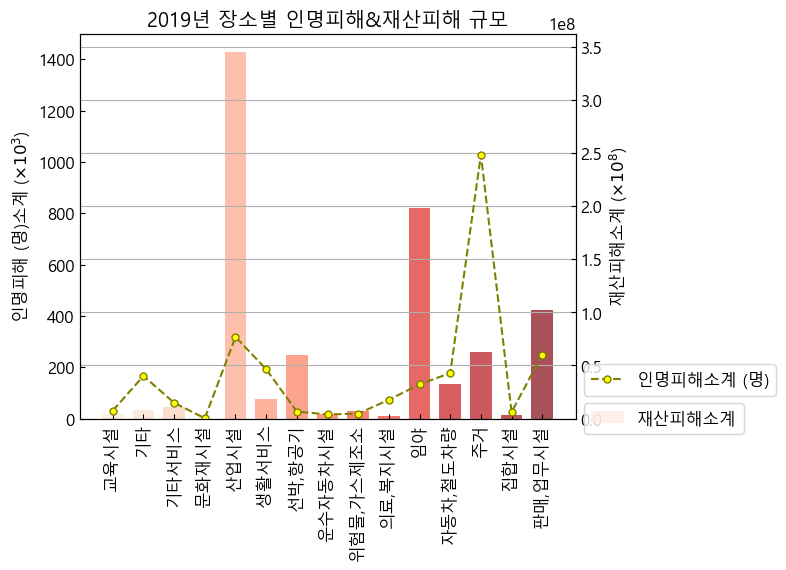

In [14]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

x = data2.index
y1 = data2['인명피해(명)소계']
y2 = data2['재산피해소계']

fig, ax1 = plt.subplots()
plt.title("2019년 장소별 인명피해&재산피해 규모")

ax1.plot(x, y1, '-s', color = 'olive', linestyle='dashed', marker='o',
        markerfacecolor = 'yellow', markersize=5, label='인명피해소계 (명)')
ax1.set_ylim(0, 1500)
ax1.set_ylabel(r'인명피해 (명)소계 ($\times10^3$)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color = mycolour, label='재산피해소계', alpha=0.7, width=0.7)
ax2.set_ylabel(r'재산피해소계 ($\times10^8$)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.1))

box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0))

for tick in ax1.get_xticklabels():
    tick.set_rotation('vertical')

plt.grid()
plt.show()

### 지도 시각화 전에 데이터 정제하기

#### 생각할 것
#### 1. 우리가 가진 데이터를 어떻게 분석하지?
#### 2. 분석한 데이터 결과를 동 단위로 컬러링할건데, 어떻게?(위/경도값이 없고 동 정보만 있음)

#### 우선 시군구동의 단위로 재산피해가 얼만큼인지 묶기

#### 어떻게 묶어서 분석해야할까
#### 장소대분류 칼럼에서 산업시설로 조회해본다.

In [18]:
data_1 = data[data['장소대분류']=='산업시설']
data_1.head()

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
13,2019-01-01 02:54,경기도,포천시,화현면,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,47070,산업시설,공장시설,제재 및 목공업
47,2019-01-01 11:27,경상북도,구미시,도개면,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",종이,0,0,0,186681,산업시설,동식물시설,기타 동식물시설
55,2019-01-01 12:37,경기도,하남시,상산곡동,"건축,구조물","불꽃, 불티",굴뚝(연통) 아궁이,부주의,"불씨,불꽃,화원방치",기타,기타,0,0,0,27205,산업시설,작업장,기타 작업장
56,2019-01-01 12:44,경상남도,창원시 성산구,귀곡동,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,절연열화에 의한 단락,미상,미상,0,0,0,2909,산업시설,발전시설,기타 발전시설
65,2019-01-01 13:48,세종특별자치시,세종,소정면,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,248130,산업시설,공장시설,식료품공업


In [19]:
#총 40,103개의 데이터 중 산업시설에서 발생한 화재 건수는 5,429건
len(data_1)

5429

In [31]:
data2 = data_1.loc[:, ['시도', '시·군·구', '읍면동', '재산피해소계']]
data2.head()

,시도,시·군·구,읍면동,재산피해소계
13,경기도,포천시,화현면,47070
47,경상북도,구미시,도개면,186681
55,경기도,하남시,상산곡동,27205
56,경상남도,창원시 성산구,귀곡동,2909
65,세종특별자치시,세종,소정면,248130


#### 시도, 시군구, 읍면동 단위로 groupby 하고 3개의 칼럼 합치기

In [32]:
dong_data = data2.groupby(['시도', '시·군·구', '읍면동']).sum('재산피해소계')
display(dong_data.head())

재산피해소계
시도  시·군·구 읍면동          
강원도 강릉시   강동면     71110
          구정면      3109
          난곡동       442
          대전동  34471631
          사천면      9254

In [33]:
len(dong_data)

1884

#### 주소 관련 3개의 칼럼 합치기 (띄어쓰기 포함)

In [34]:
data2['주소'] = data2['시도'] + " " + data2['시·군·구'] + " " + data2['읍면동']
display(data2.head())

,시도,시·군·구,읍면동,재산피해소계,주소
13,경기도,포천시,화현면,47070,경기도 포천시 화현면
47,경상북도,구미시,도개면,186681,경상북도 구미시 도개면
55,경기도,하남시,상산곡동,27205,경기도 하남시 상산곡동
56,경상남도,창원시 성산구,귀곡동,2909,경상남도 창원시 성산구 귀곡동
65,세종특별자치시,세종,소정면,248130,세종특별자치시 세종 소정면


In [35]:
data3 = data2.loc[:, ['주소', '재산피해소계']]
data3.head()

,주소,재산피해소계
13,경기도 포천시 화현면,47070
47,경상북도 구미시 도개면,186681
55,경기도 하남시 상산곡동,27205
56,경상남도 창원시 성산구 귀곡동,2909
65,세종특별자치시 세종 소정면,248130


In [48]:
all_addr = data3.groupby(['주소']).sum('재산피해소계')
print(all_addr.head())

               재산피해소계
주소                   
강원도 강릉시 강동면     71110
강원도 강릉시 구정면      3109
강원도 강릉시 난곡동       442
강원도 강릉시 대전동  34471631
강원도 강릉시 사천면      9254


In [49]:
len(all_addr)

1884

In [66]:
display(all_addr.sort_values(by=['재산피해소계'], ascending=False).head())

,재산피해소계
주소,
강원도 강릉시 대전동,34471631
경상북도 구미시 공단동,14829822
경기도 화성시 향남읍,10377206
경기도 화성시 우정읍,9969932
경기도 안성시 양성면,8242208


In [54]:
all_addr.to_csv('data/동별_재산피해소계.csv', encoding='utf-8')

### 지도시각화
### 대한민국 시군구동(읍,면)까지 나누어진 geojson을 이용한다.

In [1]:
import folium
import json
folium.__version__

'0.11.0'

In [2]:
geo_data = 'data/HangJeongDong_ver20121210.geojson'

In [31]:
dong = pd.read_csv("data/all_dong.csv", encoding='utf-8')
display(dong.head(10))

,행정동주소,재산피해소계
0,강원도 강릉시 강남동,61543
1,강원도 강릉시 강동면,71110
2,강원도 강릉시 경포동,34472114
3,강원도 강릉시 구정면,3109
4,강원도 강릉시 사천면,9254
5,강원도 강릉시 연곡면,54468
6,강원도 강릉시 옥계면,45863
7,강원도 강릉시 주문진읍,821
8,강원도 강릉시 포남1동,26
9,강원도 고성군 죽왕면,73


In [32]:
len(dong)

1589

In [33]:
display(dong.sort_values(by=['재산피해소계'], ascending=False).head(30))

,행정동주소,재산피해소계
2,강원도 강릉시 경포동,34472114
601,경상북도 구미시 공단2동,14830681
600,경상북도 구미시 공단1동,14829822
402,경기도 화성시 향남읍,10377206
397,경기도 화성시 우정읍,9969932
240,경기도 안성시 양성면,8242208
118,경기도 고양시일산동구 고봉동,6401861
78,강원도 평창군 미탄면,5585571
1033,인천광역시 미추홀구 주안1동,5140499
233,경기도 안성시 미양면,5137655


In [34]:
dong.drop([2, 601, 600, 402], inplace=True, axis=0)

In [35]:
dong.set_index('행정동주소', inplace=True)

In [36]:
display(dong.head(30))

,재산피해소계
행정동주소,
강원도 강릉시 강남동,61543
강원도 강릉시 강동면,71110
강원도 강릉시 구정면,3109
강원도 강릉시 사천면,9254
강원도 강릉시 연곡면,54468
강원도 강릉시 옥계면,45863
강원도 강릉시 주문진읍,821
강원도 강릉시 포남1동,26
강원도 고성군 죽왕면,73


In [28]:
dong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 강원도 강릉시 강남동 to 충청북도 충주시 호암·직동
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   재산피해소계  1589 non-null   int64
dtypes: int64(1)
memory usage: 24.8+ KB


#### 전국 단위 시군구동읍면 geojson test

In [8]:
map_osm = folium.Map(location=[37.566345, 126.977893])
rfile = open('data/HangJeongDong_ver20121210.geojson', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)
korea_map = folium.GeoJson(jsonData, name='json_data').add_to(map_osm)
display(korea_map)
map_osm.save('data/korea_map.html')

#### 지역별 재산피해 정도 컬러로 표시하기

In [38]:
map_osm = folium.Map(location=[37.566345, 126.977893], zoom_start=10)
rfile = open('data/HangJeongDong_ver20121210.geojson', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)
dong_map = folium.Choropleth(geo_data=jsonData, 
                            data=dong,
                            columns=(dong.index, '재산피해소계'),
                            key_on='feature.properties.adm_nm',
                            fill_color='RdPu',
                            legend_name='재산피해금액').add_to(map_osm)
display(dong_map)
map_osm.save('data/fire_dong_map.html')

#### amd_cd는 법정동, amd_nm은 행정동. 내가 갖고있는 GeoJson은 행정동

#### 법정동으로 된 shp를 geojson으로 변환하여 불러옴

###### 법정동경계 잘 보이나 test

In [3]:
# map_osm = folium.Map(location=[37.566345, 126.977893])
# rfile = open('data/EMD.zip.geojson', 'r', encoding='utf-8').read()
# jsonData = json.loads(rfile)
# korea_map = folium.GeoJson(jsonData, name='json_data').add_to(map_osm)
# display(korea_map)
# map_osm.save('data/test.html')